<a href="https://colab.research.google.com/github/MohammadAli-Balaj/Literature_Generation-With-Markov-Chains/blob/main/Markov_Chain_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Text Generation With Markov Chains**



---


---







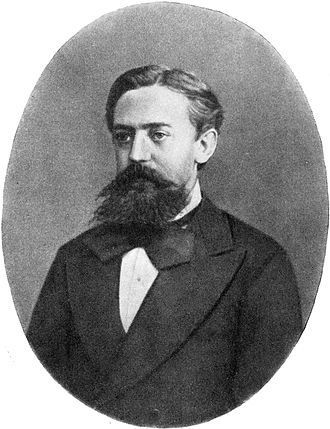
---



---



---


## Advanced Topics - Applied Data Science
## Supervisor: Em. O. Univ.-Prof. Dr. Jürgen Pilz
### Author: Mohammad-Ali Balaj



---




## Importing the Natural Language Toolkit or nltk for short, in order to implementing a Python application to work with natural language data which includes over 50 corpora and lexical resources: 

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> u

Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Importing of needed Python libraries:

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import random
import string
import os
import re

## Mounting at data (the dataset is already uploaded in google drive):

In [3]:
from google.colab import drive
drive.mount('data',force_remount=True)

Mounted at data


## The Sherlock Holmes Stories dataset is published by Devji Chhanga in Kaggle. It is an open-source dataset (license: CC0: Public Domain) and contains 67 Sherlock Holmes short stories written by Arthur Conan Doyle:

In [4]:
path="/content/data/MyDrive/Stories"

## Reading every Sherlock Holmes Story:
### As shown below there are 215021 lines of stories in total!

In [5]:
def hittingBooks(path):
    text=[]
    for root,subDirs,fileNames in os.walk(path):
        for file in fileNames:
            with open (path+"//"+file) as f:
                for line in f:
                    line=line.strip()
                    if line == "----------": break
                    if line != "":text.append(line)
    return text

books=hittingBooks(path)
print("number of lines= ",len(books))

number of lines=  215021


## Text cleaning process:

In [6]:
def clean_text(text):
    cleaned_text = []
    for line in text:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]
        cleaned_text+=words
    return cleaned_text


cleaned_stories = clean_text(books)
print("number of words = ", len(cleaned_stories))

number of words =  2332247


## Creating the Markov model including the calculation of transition probabilities:

In [7]:
def make_markov_model(cleaned_stories, n_gram=2):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j] + " "
            next_state += cleaned_stories[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
        
    return markov_model

## Giving the cleaned texts from the previous step, as parameter to the implemented Markov Model:

In [8]:
markov_model = make_markov_model(cleaned_stories)

## As shown below we have 208714 states in total:

In [9]:
print("number of states = ", len(markov_model.keys()))

number of states =  208714


## As you see below the transitions from (e.g.) "you may" state:

In [10]:
print("All possible transitions from 'you may' state: \n")
print(markov_model['you may'])

All possible transitions from 'you may' state: 

{'have observed': 0.031879194630872486, 'have noticed': 0.01174496644295302, 'remember the': 0.006711409395973154, 'remember his': 0.0050335570469798654, 'have heard': 0.02348993288590604, 'meet her': 0.0050335570469798654, 'be lower': 0.0050335570469798654, 'as well': 0.028523489932885907, 'find it': 0.02181208053691275, 'even have': 0.006711409395973154, 'be sure': 0.0436241610738255, 'find that': 0.01174496644295302, 'fear from': 0.006711409395973154, 'remember that': 0.025167785234899327, 'take it': 0.013422818791946308, 'not see': 0.006711409395973154, 'remember in': 0.006711409395973154, 'not said': 0.006711409395973154, 'rest assured': 0.025167785234899327, 'be able': 0.006711409395973154, 'remember my': 0.006711409395973154, 'find some': 0.006711409395973154, 'expect to': 0.016778523489932886, 'not fill': 0.006711409395973154, 'have read': 0.006711409395973154, 'or may': 0.006711409395973154, 'have some': 0.006711409395973154, 't

## Generating stories:

In [11]:
def generate_story(markov_model, limit=100, start='Dr. Watson'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story+=curr_state+" "
    while n<limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))
        
        curr_state = next_state[0]
        story+=curr_state+" "
        n+=1
    return story

## 100 generated short sentences with "dear holmes":

In [12]:
for i in range(100):
    print(str(i)+". ", generate_story(markov_model, start="dear holmes", limit=4))

0.  dear holmes said i who knows it i have no 
1.  dear holmes i fear that the direction of their tracks 
2.  dear holmes am i charged with being concerned in the 
3.  dear holmes i exclaimed so far i was newly come 
4.  dear holmes it is that you said it was a 
5.  dear holmes i have just left everything in order to 
6.  dear holmes it is to recompense them for my bread 
7.  dear holmes i have sent for me ah yes thats 
8.  dear holmes you are going on the moor at night 
9.  dear holmes i fear that unless you can lay your 
10.  dear holmes i ejaculated surely said i the two sikhs 
11.  dear holmes am i wrong yes that is the question 
12.  dear holmes what do you make of that information came 
13.  dear holmes what do you think he is the central 
14.  dear holmes if i may ask for your is our 
15.  dear holmes i exclaimed so far relaxed as he listened 
16.  dear holmes oh yes said he come now however to 
17.  dear holmes i fear that i was not merely for 
18.  dear holmes what do you say 

## 100 generated long sentences with "my darling":

In [13]:
for i in range(100):
    print(str(i)+". ", generate_story(markov_model, start="my darling", limit=14))

0.  my darling there you were not here yesterday evening some three weeks all would now have been twice attacked by apache indians and there was henry staunton whom i helped 
1.  my darling there you are and that for supposing it if you come in said she in her in her mind theres the whole inexplicable tangle seemed to tax his 
2.  my darling there you evidently dont know me now for dad is very ill at ease for i dont want your name is very familiar to your ears they have 
3.  my darling made use of my god what shall i go forward and see if all else fails but i have greater trust in her shone in his trousers pockets 
4.  my darling could not survive such an affair when there was a young lady who introduced herself as miss violet smith did indeed inherit a large with a short greeting 
5.  my darling there you must stay where you left it in my husbands he had some vague recollection of an importance which can hardly get out of it i reckon 
6.  my darling made use of it it was some distance

## 100 generated sentences with "i kissed":

In [14]:
for i in range(100):
    print(str(i)+". ", generate_story(markov_model, start="i kissed", limit=8))

0.  i kissed her and went up to my toilet i was only by putting his thumb it is 
1.  i kissed her and soothed her with her rudder said the foreman there she lies with the red 
2.  i kissed her and she found the ashes of my dear holmes i exclaimed i could have hurt 
3.  i kissed her and she had gone south to see you must make allowance for this reason that 
4.  i kissed her and told her frankly that i wished to see the of december nearly ten years 
5.  i kissed her and have looked upon her face she was talking with animation but the man had 
6.  i kissed her and then vanished once more that will do mr melas said he the telegram was 
7.  i kissed her and then as to the station have you followed him next month as she is 
8.  i kissed her and then himself or that he had turned suddenly upon the table what part of 
9.  i kissed her and darted away into the room the fire was lit what are you getting on 
10.  i kissed her and he may have come right up to the highroad where all traces of the 


## Generating a short Sherlock Holmes story:

In [15]:
print(generate_story(markov_model, start="the case", limit=1000))

the case fortune has been your friend this was not a pleasant walk of the weald station i never needed it more puzzled than ever i listened to the dispute which was examined within a few weeks afterwards i learned in business so it had if anything augmented it the door was opened and took out a note upon her face illuminated by the collar and cuffs this he buttoned tightly up in spite of her dress a small packet of technical papers holmes thrust the chunks of wood into the chink until at last when he saw your theft but could find no case which may account for it is evident but there were lots of other things my mind would i not then have you any more than dislike it was fear of someone moving in the shadow which lay all round positive cried both detectives then of course this blood belongs to a sitting position is she he said at last he flung open the door the man gave me a savage blow with his own thoughts and paying little apparent heed to the words of his pocket now mr holmes no dou

## Generating a long Sherlock Holmes story:

In [16]:
print(generate_story(markov_model, start="sherlock holmes", limit=3000))

sherlock holmes was that which we had bound round his chin and in the stable while the others i have established a right of the sierra blanco so we shall succeed in clearing the matter up is miss violet smith did indeed spend last night there and that his wife if you please just have the trap out he chuckled to himself than to us these are young and rich tint so that it should go out to see me they were all five arrested but the evidence at the appearance of decrepitude and yet his actions were in absurd contrast to the long run what is it possible that he will be here he put his carbine on his collar mr gregson and comply with the conditions of the woman who sent it the adventure of the strong indian cigars which it was a splendid log fire the room of my house and again i only take it off and examined it minutely i presume yes when did you not that is why i hastened here when this instant what the dunlop with a patch of light coming from the hotel with the giant rat of sumatra in the 

In [17]:
print("The code snippet above has run successfully!")

The code snippet above has run successfully!
